In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
DTYPE = np.float32

[ 0.1 10. ]
<class 'numpy.float32'>
<class 'numpy.float32'>


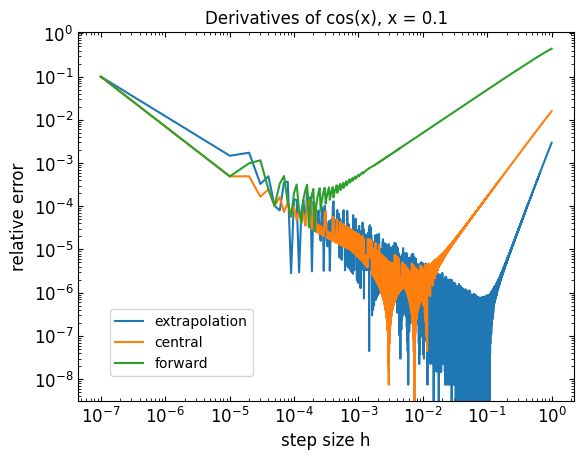

<class 'numpy.float32'>
<class 'numpy.float32'>


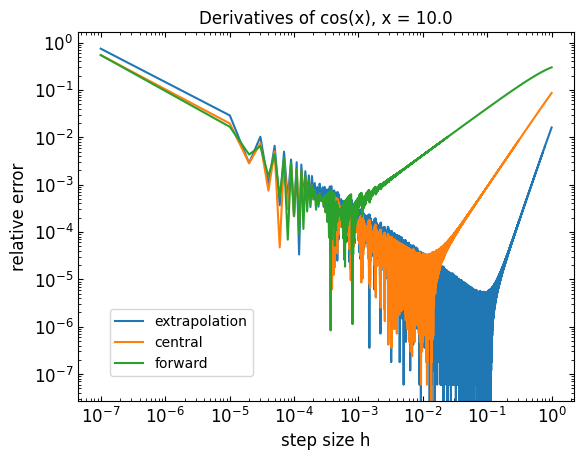

In [2]:
DTYPE = np.float32
step = np.linspace(10**(-7),1,100000, dtype= DTYPE)
step = np.array(step,dtype= DTYPE)

#x1 = np.float32(0.1)
#x2 = np.float32(10)
x_vals =[0.1,10]
x_vals = np.array(x_vals,dtype=DTYPE)
print(x_vals)

for x in x_vals:
    # = np.int32(x)
    dcos = (np.cos(x + step,dtype=DTYPE) - np.cos(x,dtype=DTYPE)) / step
    print(type(x+step[0]))
    print(type(dcos[0]))

    #deltacos = np.array(dcos/step,dtype=DTYPE)

    real_dcos = np.array(-np.sin(x,dtype=DTYPE),dtype=DTYPE)

    error1 = np.array(abs(dcos - real_dcos),dtype=DTYPE)
    #print(error1)


    #data_forward = np.column_stack((step, error1))
    #ilename = "forward-derive-cos-{index_f}.csv"
    #np.savetxt(filename, data_forward, delimiter=",", header="step,error1", comments='')


    dcos_midpoint = (np.cos(np.float32(x+step),dtype=DTYPE) - np.cos(np.float32(x-step),dtype=DTYPE))/(step*np.float32(2))
    error2 = np.array(abs(dcos_midpoint - real_dcos),dtype=DTYPE)



    #data_central = np.column_stack((step, error2))
    #filename_central = "central-derive-cos-{index_f}.csv"
    #np.savetxt(filename_central, data_central, delimiter=",", header="step,error1", comments='')


    dcos_extrap = -np.cos(np.float32(x+np.float32(2)*step),dtype=DTYPE) + np.float32(8)*np.cos(np.float32(x+step),dtype=DTYPE) - np.float32(8)*np.cos(np.float32(x-step),dtype=DTYPE) + np.cos(np.float32(x-np.float32(2)*step),dtype=DTYPE)
    dcos_e = dcos_extrap/(step*np.float32(12))
    error_extrap = np.array(abs(dcos_e - real_dcos),dtype=DTYPE)

    plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
    #data_extrap = np.column_stack((step, error_extrap))
    #filename_extrap = "extrap-derive-cos-{index_f}.csv"
    #np.savetxt(filename_extrap, data_extrap, delimiter=",", header="step,error1", comments='')


    plt.loglog(step,error_extrap, label = "extrapolation")
    plt.loglog(step,error2, label = "central")
    plt.loglog(step,error1,label = "forward")

    index_f += 1
    plt.legend(loc="lower left", bbox_to_anchor=(0.05, 0.05))
    plt.ylabel("relative error",fontsize = "12")
    plt.xlabel("step size h",fontsize = "12")
    #plt.ylim(10**(-8),1)

    plt.title(f"Derivatives of cos(x), x = {x:.1f}")
    plt.savefig(f"plot_cos{index_f}.png")
    plt.show()




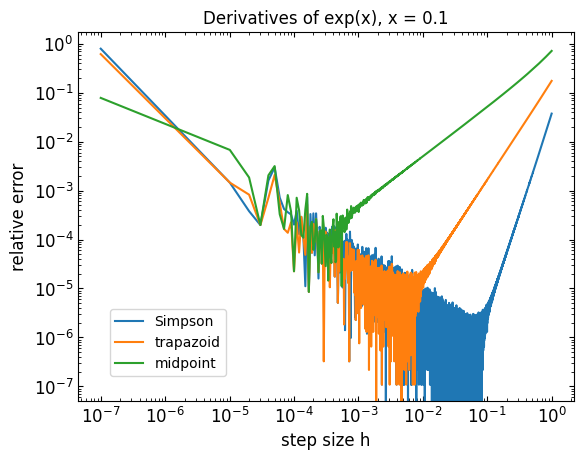

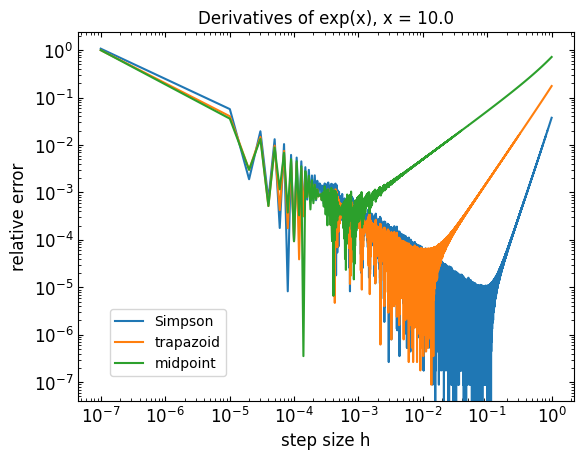

In [3]:

#exp
step_exp = np.linspace(10**(-7),1,100000, dtype= DTYPE)
step_exp = np.array(step_exp,dtype= DTYPE)
x_vals = [0.1,10]
x_vals = np.array(x_vals,dtype=DTYPE)

for x in x_vals:

    dexp = (np.exp(x+step_exp,dtype=DTYPE) - np.exp(x,dtype=DTYPE))/step_exp

    deltaexp = np.array(dexp/step_exp,dtype=DTYPE)

    real_dexp = np.array(np.exp(x),dtype=DTYPE)

    error1_exp = np.array(abs(dexp - real_dexp)/real_dexp,dtype=DTYPE)
    #print(error1)

    #print(error1)
    #
    dexp_central = (np.exp(x+step_exp,dtype=DTYPE) - np.exp(x-step_exp,dtype=DTYPE))/(step_exp*2)
    error2_exp = np.array(abs(dexp_central - real_dexp)/real_dexp,dtype=DTYPE)


    dexp_extrap = -np.exp(x+2*step_exp,dtype=DTYPE) + 8*np.exp(x+step_exp,dtype=DTYPE) - 8*np.exp(x-step_exp,dtype=DTYPE) + np.exp(x-2*step_exp,dtype= DTYPE)
    dexp_e = dexp_extrap/(step_exp*12)
    error_extrap_exp = np.array(abs(dexp_e - real_dexp)/real_dexp,dtype=DTYPE)



    plt.loglog(step_exp,error_extrap_exp,label = "Simpson")
    plt.loglog(step_exp,error2_exp,label = "trapazoid")
    plt.loglog(step_exp,error1_exp,label = "midpoint")


    plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
    plt.legend(loc="lower left", bbox_to_anchor=(0.05, 0.05))
    plt.ylabel("relative error",fontsize = "12")
    plt.xlabel("step size h",fontsize = "12")
    #plt.ylim(10**(-8),10)

    plt.title(f"Derivatives of exp(x), x = {x:.1f}")
    plt.savefig(f"plot_exp{index_f2}.png")
    plt.show()




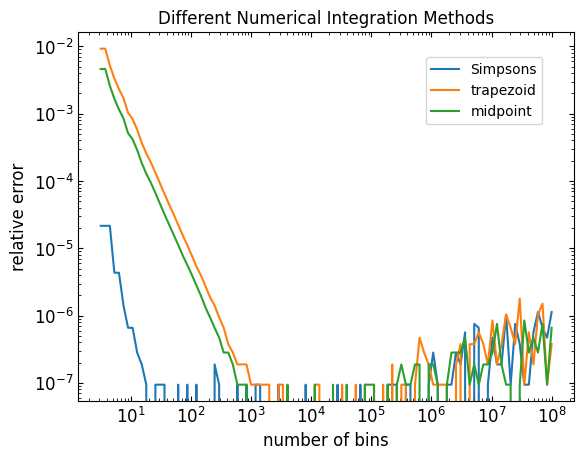

In [71]:

#exp integral
DTYPE = np.float32
#diff_num_bins_N = np.arange(1,10**4,100)
bins_N_exp = np.logspace(0.5,8,100, dtype= DTYPE)
#print(diff_num_bins)

def function_exp(value):
    out = np.exp(-value)
    #out = np.array(out,dtype=DTYPE)
    return out
def midpoint_integral_n_bins(n):
  n = np.int32(n)
  i = np.arange(0,n,dtype=DTYPE)
  #bin_vals = np.linspace(0,1,x)
  #print(len(bin_vals))
  width = np.float32(1)

  bin_width = width/n
  bin_width = np.array(bin_width,dtype=DTYPE)

  half = np.float32(0.5)

  midpoints = (i + half)*bin_width
  midpoints = np.array(midpoints,dtype=DTYPE)

  midpoint_vals = np.array(function_exp(midpoints),dtype=DTYPE)
  integrated_val = np.sum(midpoint_vals*bin_width,dtype=DTYPE)
  return integrated_val

def calculate_relative_error(evaluation,real_value):
    return np.array(np.abs((evaluation-real_value)/real_value),dtype =DTYPE)



def trap_integral_for_n_bins(n):
    n = int(n)
    i_bins = np.arange(0, n+1, dtype=DTYPE)
    bin_width = np.float32(1.0) / n
    bin_width = np.array(bin_width, dtype=DTYPE)

    x_vals = i_bins * bin_width
    f_vals = function_exp(x_vals)

    integral = bin_width * (np.float32(0.5) * f_vals[0] + np.sum(f_vals[1:-1], dtype=DTYPE) + np.float32(0.5) * f_vals[-1])

    return np.array(integral, dtype=DTYPE)

def simpson_integral_for_N_bins(n):
    n = int(n)

    if n % 2 != 0:
        n += 1


    bin_width = np.float32(1.0) / n

    x_vals = np.arange(0, n + 1, dtype=np.int32) * bin_width
    f_vals = function_exp(x_vals)

    first_plus_last = f_vals[0] + f_vals[-1]
    sum_odd = np.sum(f_vals[1:n:2], dtype=DTYPE)
    sum_even = np.sum(f_vals[2:n-1:2], dtype=DTYPE)

    integral_simp = (bin_width / 3) * (first_plus_last + 4 * sum_odd + 2 * sum_even)
    return np.array(integral_simp, dtype=DTYPE)





real_integral = np.array(1-np.exp(-1),dtype=DTYPE)
errors_midpoint = []
errors_trap = []
errors_simpson = []
for n in bins_N_exp:
    n = np.int32(n)

    integrated_val = midpoint_integral_n_bins(n)
    integrated_trap_val = trap_integral_for_n_bins(n)
    integrated_simpval = simpson_integral_for_N_bins(n)
    errors_simpson.append(calculate_relative_error(integrated_simpval,real_integral))
    errors_trap.append(calculate_relative_error(integrated_trap_val,real_integral))
    errors_midpoint.append(calculate_relative_error(integrated_val,real_integral))

plt.loglog(bins_N_exp,errors_simpson,label = "Simpsons")
plt.loglog(bins_N_exp,errors_trap,label = "trapezoid")
plt.loglog(bins_N_exp,errors_midpoint,label = "midpoint")
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.legend(loc="upper right", bbox_to_anchor=(0.95, 0.95))
plt.ylabel("relative error",fontsize = "12")
plt.xlabel("number of bins",fontsize = "12")
plt.title("Different Numerical Integration Methods")
plt.savefig("numerical_integrals")
#plt.ylim(10**(-),10)



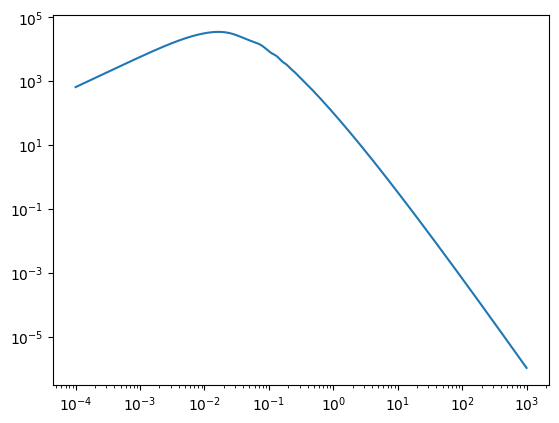

bump index  795
bump r  105.7057
18.927433


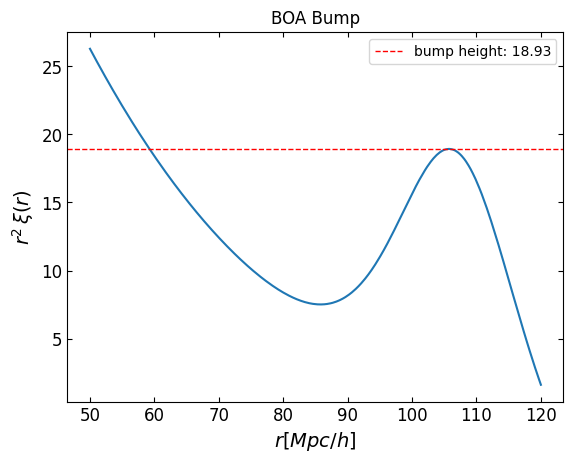

18.927433
18.927433


In [77]:
# baryon bump
from scipy.interpolate import CubicSpline


data = np.loadtxt("/content/lcdm_z0.matter_pk", usecols=(0, 1))


col1 = data[:, 0]
col2 = data[:, 1]

k = np.array(col1,dtype = DTYPE)
P_k = np.array(col2,dtype = DTYPE)

log_k = np.log(k)
log_P_k = np.log(P_k)
log_P_k_spline = CubicSpline(log_k, log_P_k)


plt.loglog(k,P_k)
plt.show()
# e(r) = 1/2pi^2 integral ( dk k^2 P(k) sin(kr)/kr)


def evaluate_e_at(k,pk,r):
    return 1/(2 * np.pi**2) * k**2 * pk * np.sin(k*r)/(k*r)

def trap_eval_w_spline_function(k_min,k_max,num_points):
  k_vals = np.logspace(np.log10(k_min),np.log10(k_max),num_points,dtype = DTYPE)
  bin_width = np.diff(k_vals)

  pk_vals = np.exp(log_P_k_spline(np.log(k_vals)))

  first = evaluate_e_at(k_vals[0],pk_vals[0],r) * bin_width[0]
  middle_points = evaluate_e_at(k_vals[1:-1],pk_vals[1:-1],r)
  index = 1
  points = []
  for point in middle_points:
    wieghted_point = point * bin_width[index]
    points.append(wieghted_point)
    index += 1
  last = evaluate_e_at(k_vals[-1],pk_vals[-1],r)* bin_width[-1]

  integral = 0.5*first + 0.5*last + np.sum(points,dtype = DTYPE)
  return np.array(integral, dtype=DTYPE)

r_vals = np.linspace(50, 120, 1000, dtype=DTYPE)
e_r_vals_trapspline = []

for r in r_vals:
    integral = trap_eval_w_spline_function(k.min(),295,100000)
    r_squared_e = r**2 * integral
    e_r_vals_trapspline.append(r_squared_e)

bump = max(e_r_vals_trapspline[300:])
bump_index = np.argmax(e_r_vals_trapspline[300:]) + 300
bump = e_r_vals_trapspline[bump_index]
bump_r = r_vals[bump_index]
print("bump index ",bump_index)
print("bump r ",bump_r)
print(bump)
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.ylabel(r"$r^{2}\,\xi(r)$", fontsize = 14)
plt.xlabel("$r [Mpc/h]$",fontsize = 14)
plt.title("BOA Bump")

plt.plot(r_vals,e_r_vals_trapspline)
plt.axhline(y=18.93, color='red', linestyle='--', linewidth=1, label = f"bump height: {bump:.2f}")
plt.legend(loc = "upper right")
plt.savefig("boa_bump")
plt.show()


print(max(e_r_vals_trapspline[int(len(e_r_vals_trapspline)/2):int(len(e_r_vals_trapspline))]))
print(max(e_r_vals_trapspline[300:]))



In [75]:
r = 50
index_test = 50
last_eval = 10**50
while True:

  this_eval = evaluate_e_at(k[index_test], np.exp(log_P_k_spline(np.log(k[index_test]))),r)
  if abs(this_eval) < (10**(-6)):
    print(index_test)
    print(k[index_test])
    print(this_eval)
    break
  last_eval = this_eval
  index_test += 1


647
295.1209
1.457277494342276e-07
